In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from pycaret.classification import *

from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

import pickle

In [2]:
pickled_model = pickle.load(open('../Model/modelo_xgboost_09_AUC.pkl', 'rb'))

In [3]:
df = pd.read_excel('../BD/NewOpportunitiesList.xlsx')

df

,Opportunity Number,Supplies Subgroup,Supplies Group,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Deal Size Category,Lat,Lon,Country_Code,Country,ID
0,6819055.0,Exterior Accessories,Car Accessories,3,20,20,1000000,1,1,0,Unknown,7,-16.130262,-63.808594,1,Bolivia,1
1,7302117.0,Batteries & Accessories,Car Accessories,2,0,0,1000000,1,1,0,Unknown,7,-16.130262,-63.808594,1,Bolivia,1
2,7482320.0,Performance Parts,Performance & Non-auto,2,1,1,1000000,1,1,0,Known,7,-16.130262,-63.808594,1,Bolivia,1
3,8467159.0,Performance Parts,Performance & Non-auto,2,1,1,1000000,1,1,0,Unknown,7,-16.130262,-63.808594,1,Bolivia,1
4,8467480.0,Interior Accessories,Car Accessories,2,1,1,1000000,1,1,0,Unknown,7,-16.130262,-63.808594,1,Bolivia,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31818,8365217.0,Shelters & RV,Performance & Non-auto,4,14,14,0,1,1,0,Unknown,1,7.928675,-67.500000,7,Venezuela,7
31819,8371795.0,Exterior Accessories,Car Accessories,3,8,8,0,1,1,0,Known,1,5.309766,-66.401367,7,Venezuela,7
31820,8549171.0,Towing & Hitches,Car Accessories,2,10,10,0,1,1,0,Unknown,1,7.928675,-67.500000,7,Venezuela,7
31821,9448754.0,Exterior Accessories,Car Accessories,2,11,11,0,1,1,0,Unknown,1,5.309766,-66.401367,7,Venezuela,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31823 entries, 0 to 31822
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Opportunity Number                       31515 non-null  float64
 1   Supplies Subgroup                        31823 non-null  object 
 2   Supplies Group                           31823 non-null  object 
 3   Sales Stage Change Count                 31823 non-null  int64  
 4   Total Days Identified Through Closing    31823 non-null  int64  
 5   Total Days Identified Through Qualified  31823 non-null  int64  
 6   Opportunity Amount USD                   31823 non-null  int64  
 7   Client Size By Revenue                   31823 non-null  int64  
 8   Client Size By Employee Count            31823 non-null  int64  
 9   Revenue From Client Past Two Years       31823 non-null  int64  
 10  Competitor Type                          31823

In [10]:
X_numerical = df.drop(['Supplies Subgroup', 'Opportunity Number', 'Supplies Group', 'Competitor Type','Lon', 'Lat', 'Client Size By Revenue',
 'Client Size By Employee Count', 'Country', 'ID'], axis=1)
X_numerical

,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Revenue From Client Past Two Years,Deal Size Category,Country_Code
0,3,20,20,1000000,0,7,1
1,2,0,0,1000000,0,7,1
2,2,1,1,1000000,0,7,1
3,2,1,1,1000000,0,7,1
4,2,1,1,1000000,0,7,1
...,...,...,...,...,...,...,...
31818,4,14,14,0,0,1,7
31819,3,8,8,0,0,1,7
31820,2,10,10,0,0,1,7
31821,2,11,11,0,0,1,7


In [11]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_numerical)
X = pd.DataFrame(X)

In [13]:
pred = pickled_model.predict(X)

In [14]:
pred_p = pickled_model.predict_proba(X)

In [17]:
pred_p[:,1]

array([0.2477835 , 0.3359533 , 0.3359533 , ..., 0.29659343, 0.29659343,
       0.2931926 ], dtype=float32)

In [18]:
df['Probabilidad'] = pred_p[:,1]

<AxesSubplot:>

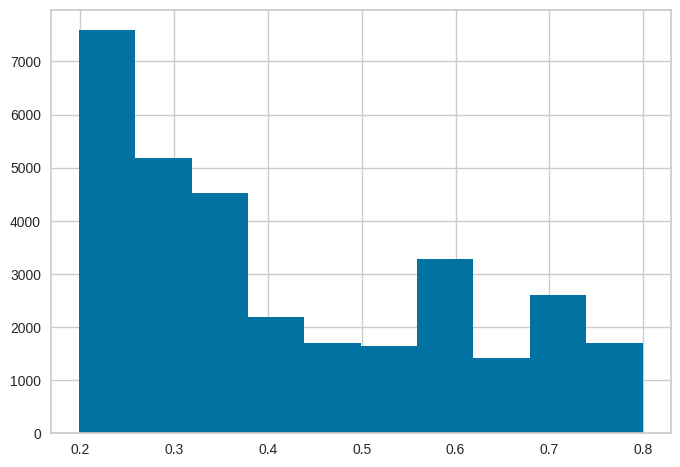

In [19]:
df['Probabilidad'].hist()

In [24]:
df.to_excel('../BD/Resultados_Prediccion.xlsx')

In [23]:
df.to_csv('../BD/Resultados_Prediccion.csv', sep=';', index=False)